In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.image as mpimg
from scipy.ndimage import rotate
from itertools import product
from tqdm import tqdm
from utils import *

animation.writer = animation.writers['ffmpeg']
plt.rcParams['figure.dpi'] = 400

### Data (solution arrays)

In [32]:
# # Unit is in m/s
# G_moon = 200 # m/s
# altitude = 500. # m
# x_pos = 0. # m? (don't think this really matters)
# entrance_x_vel = 300. # m/s
# pos = (x_pos, altitude)

# Unit is in m/s
# G_moon = 200 # m/s
altitude = 50. # m
x_pos = 5. # m? (don't think this really matters)
entrance_x_vel = 10. # m/s
pos = (x_pos, altitude)
gamma=0

In [44]:
TS, X, Y, XP, YP, UX, UY, TF = lunar_lander(pos, entrance_x_vel, gamma=0, nu=0, t_steps=1000)
print(np.min(Y))

-0.665503158938532


In [53]:
TS, X, Y, XP, YP, UX, UY, TF = lunar_lander(pos, entrance_x_vel, gamma=0, beta=100, nu=5000, t_steps=10000)
print(np.min(Y))

-0.0007099007363656189


### Basic Info Plots 

Final Time: 10.63493805438195
Final Position: (49.907, 0.0)


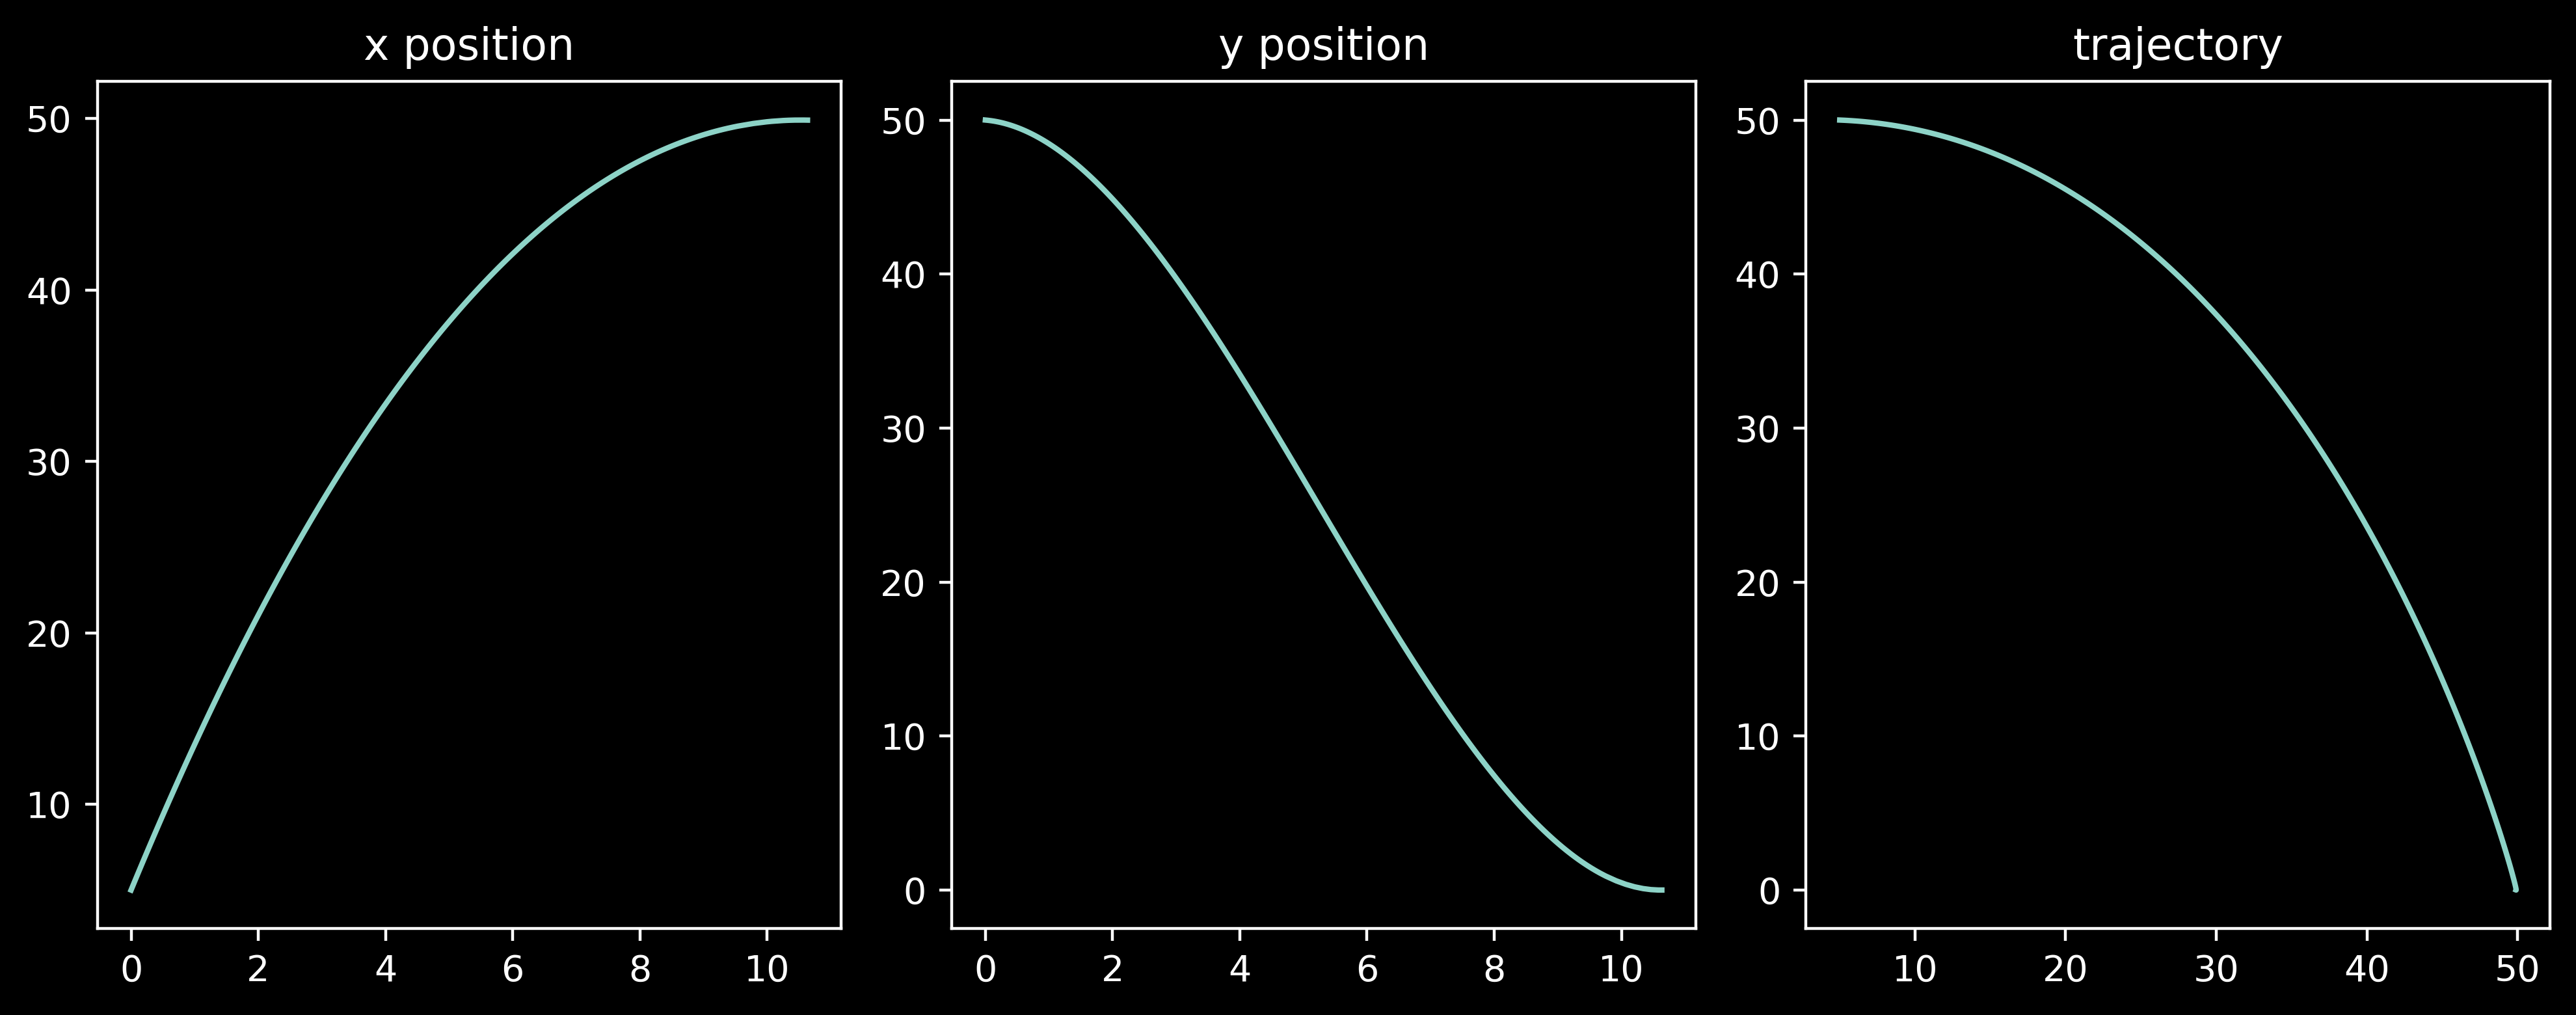

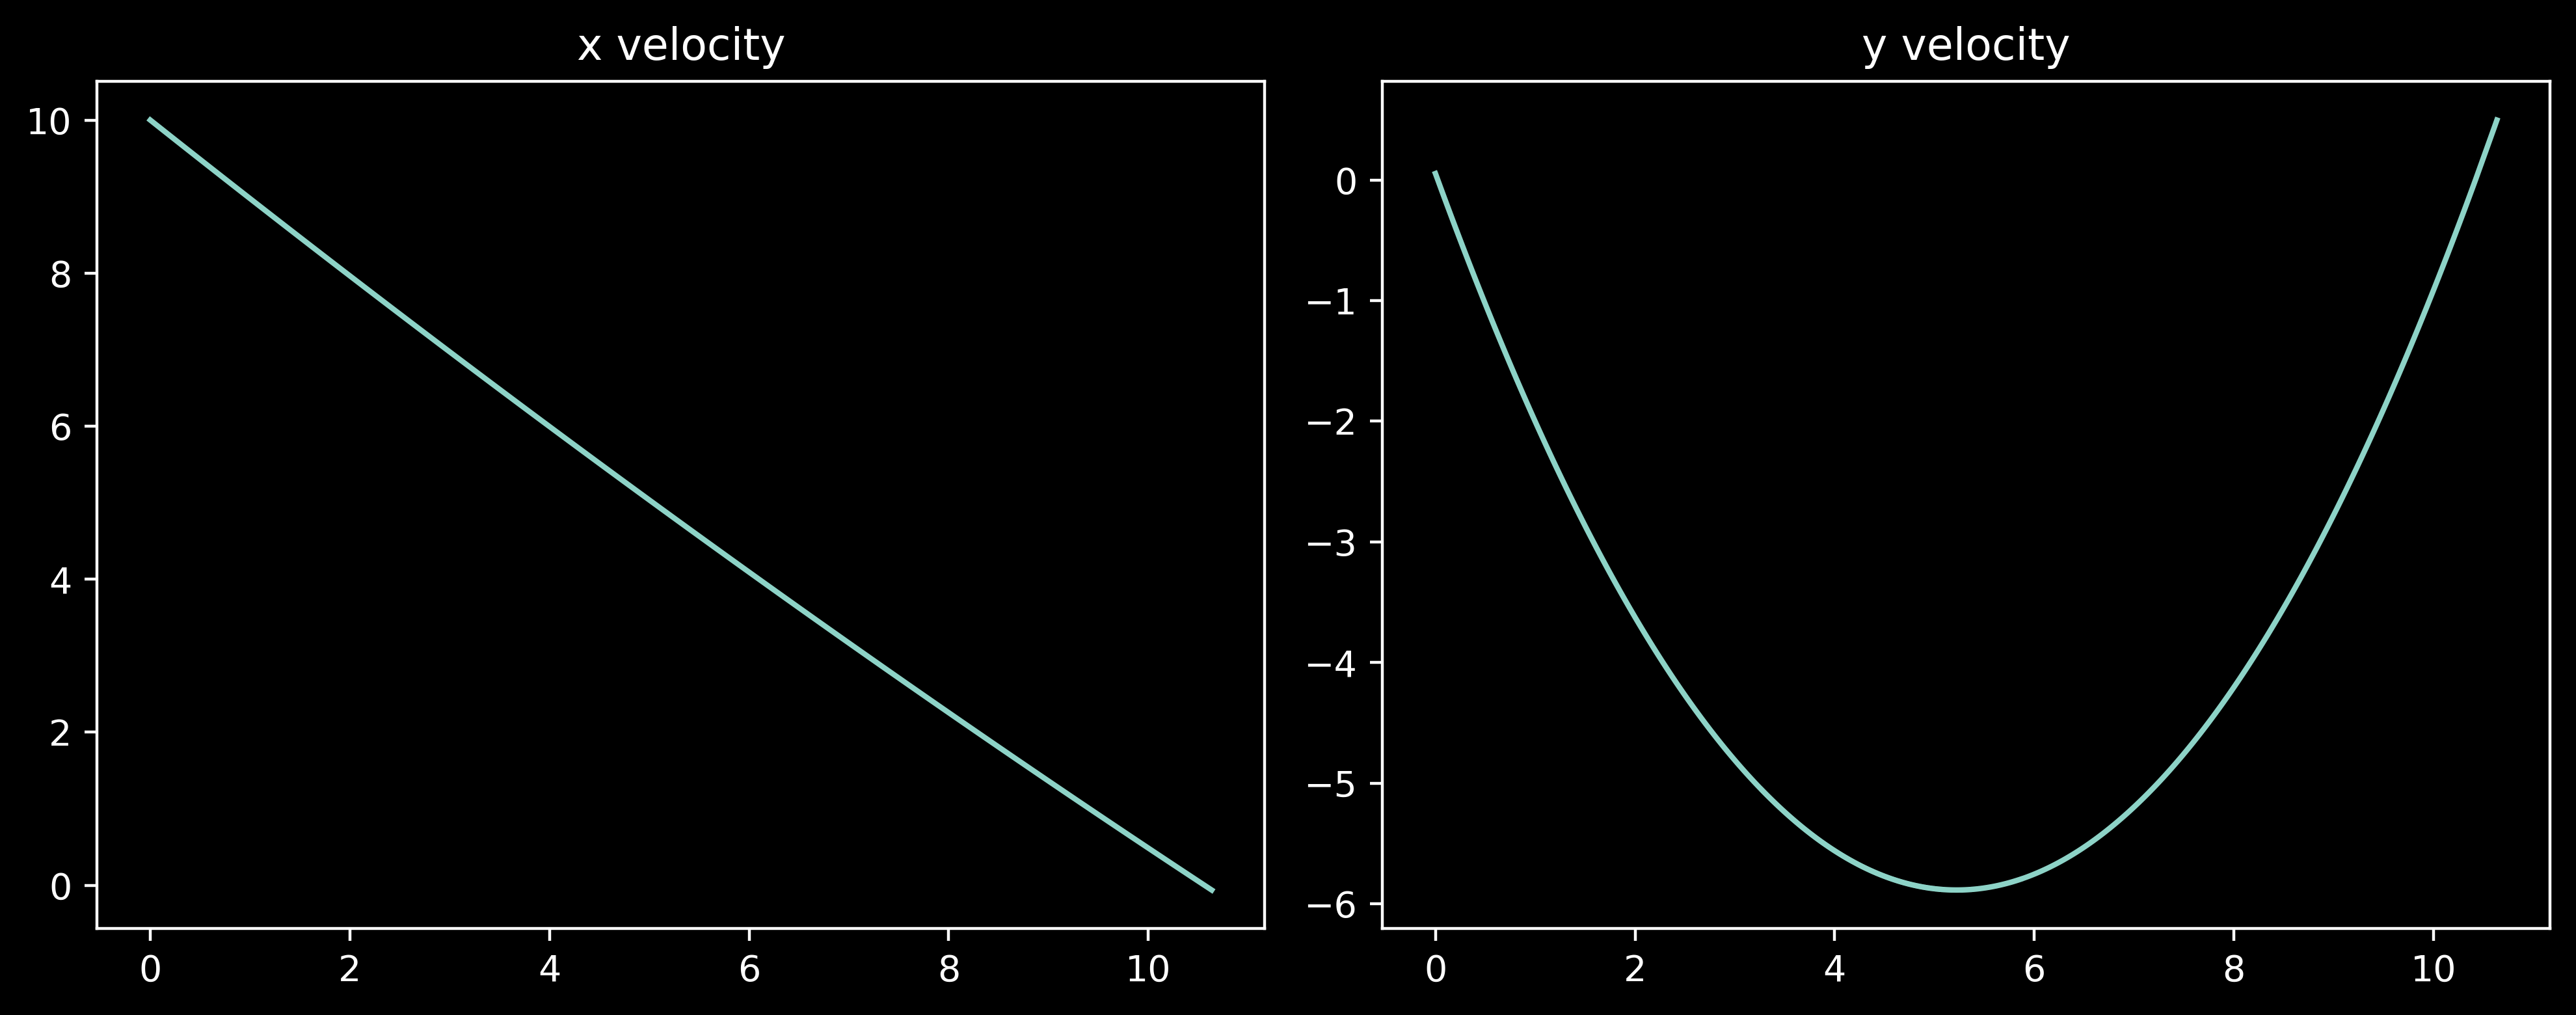

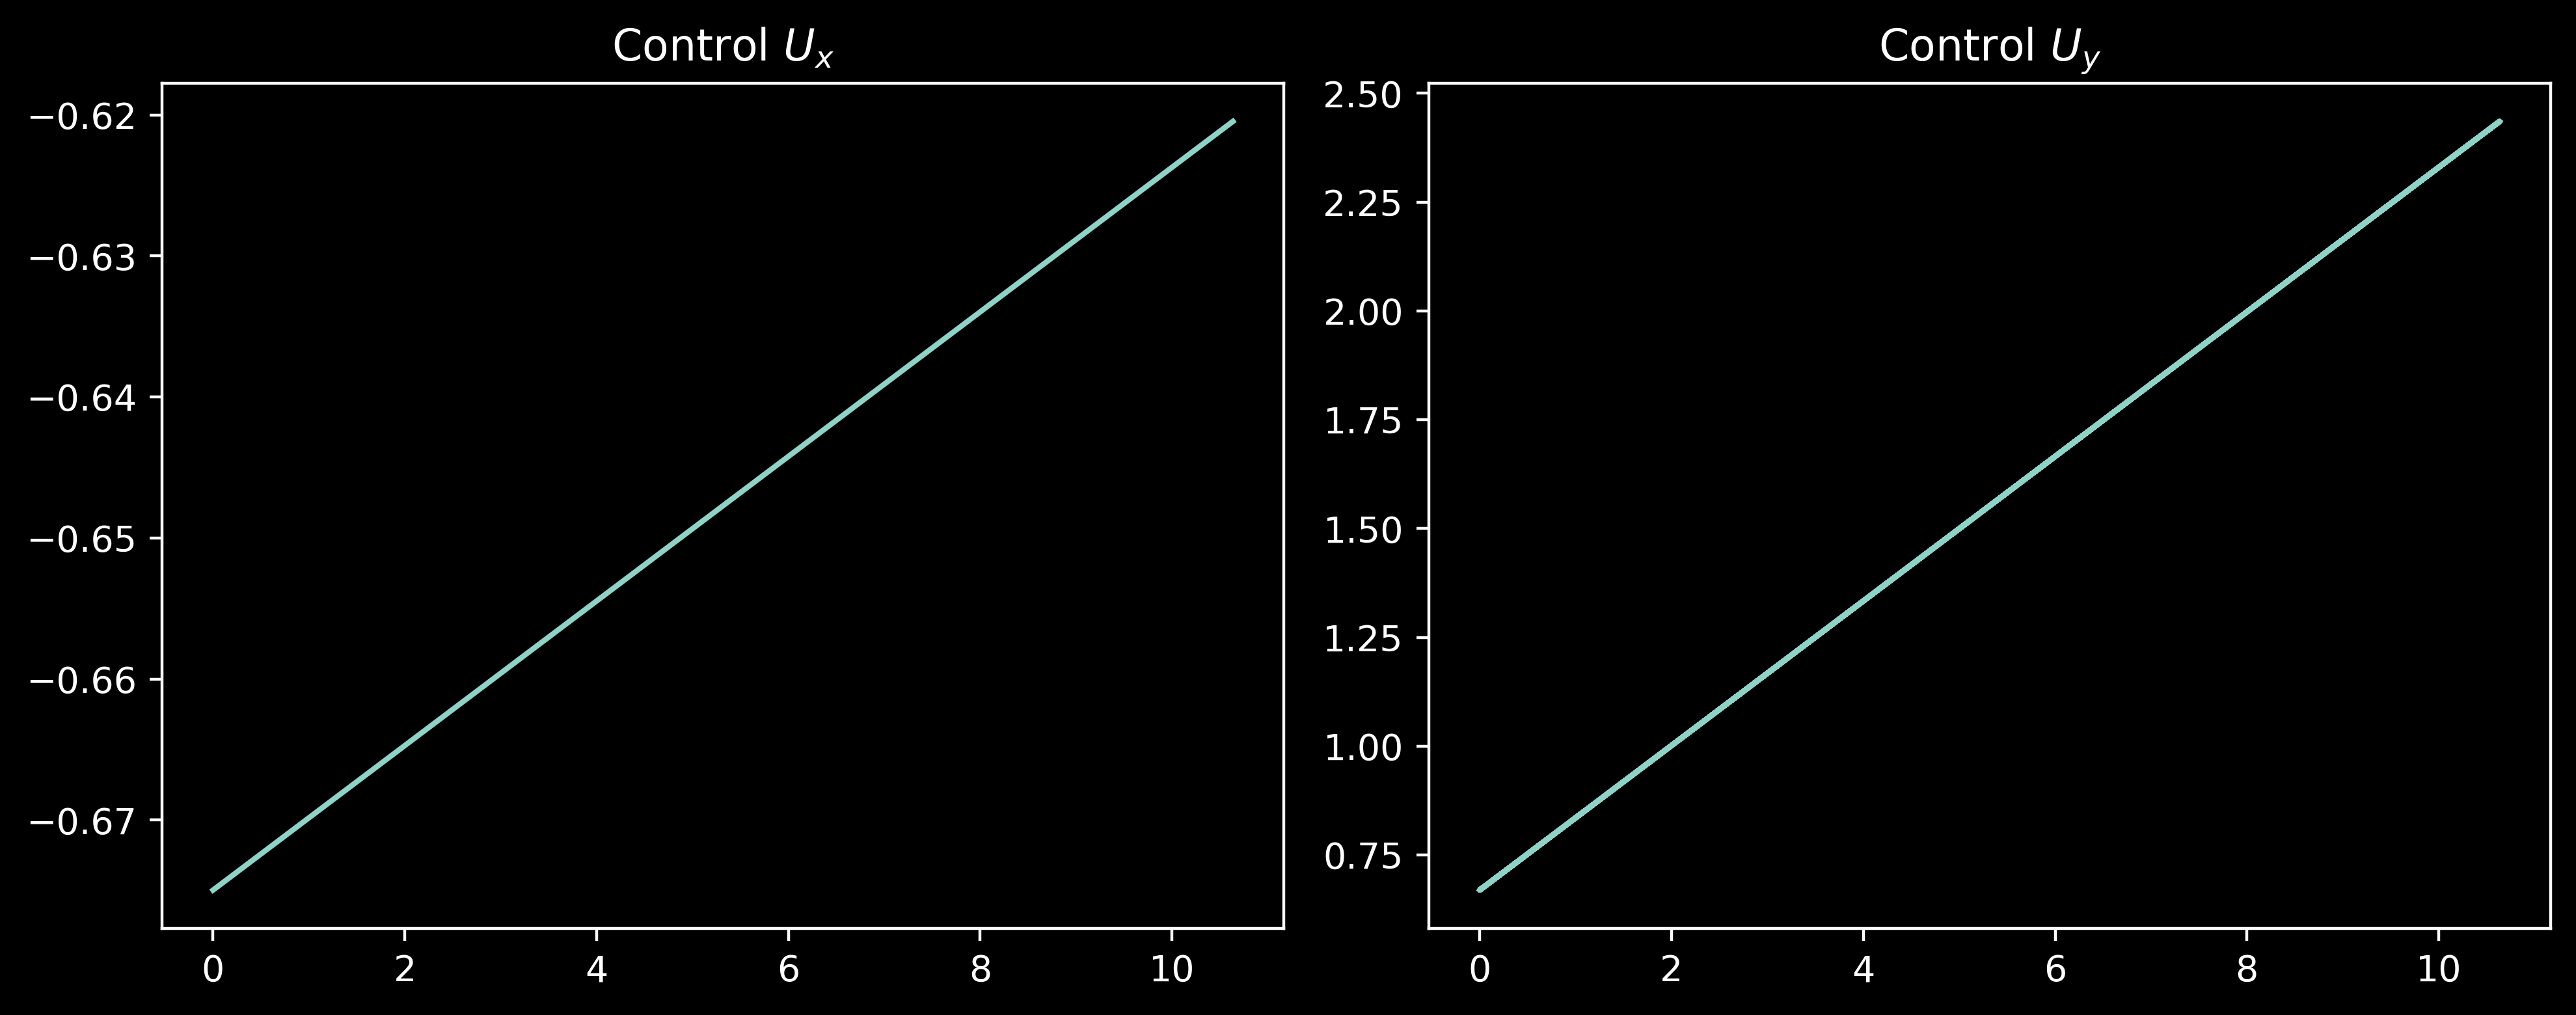

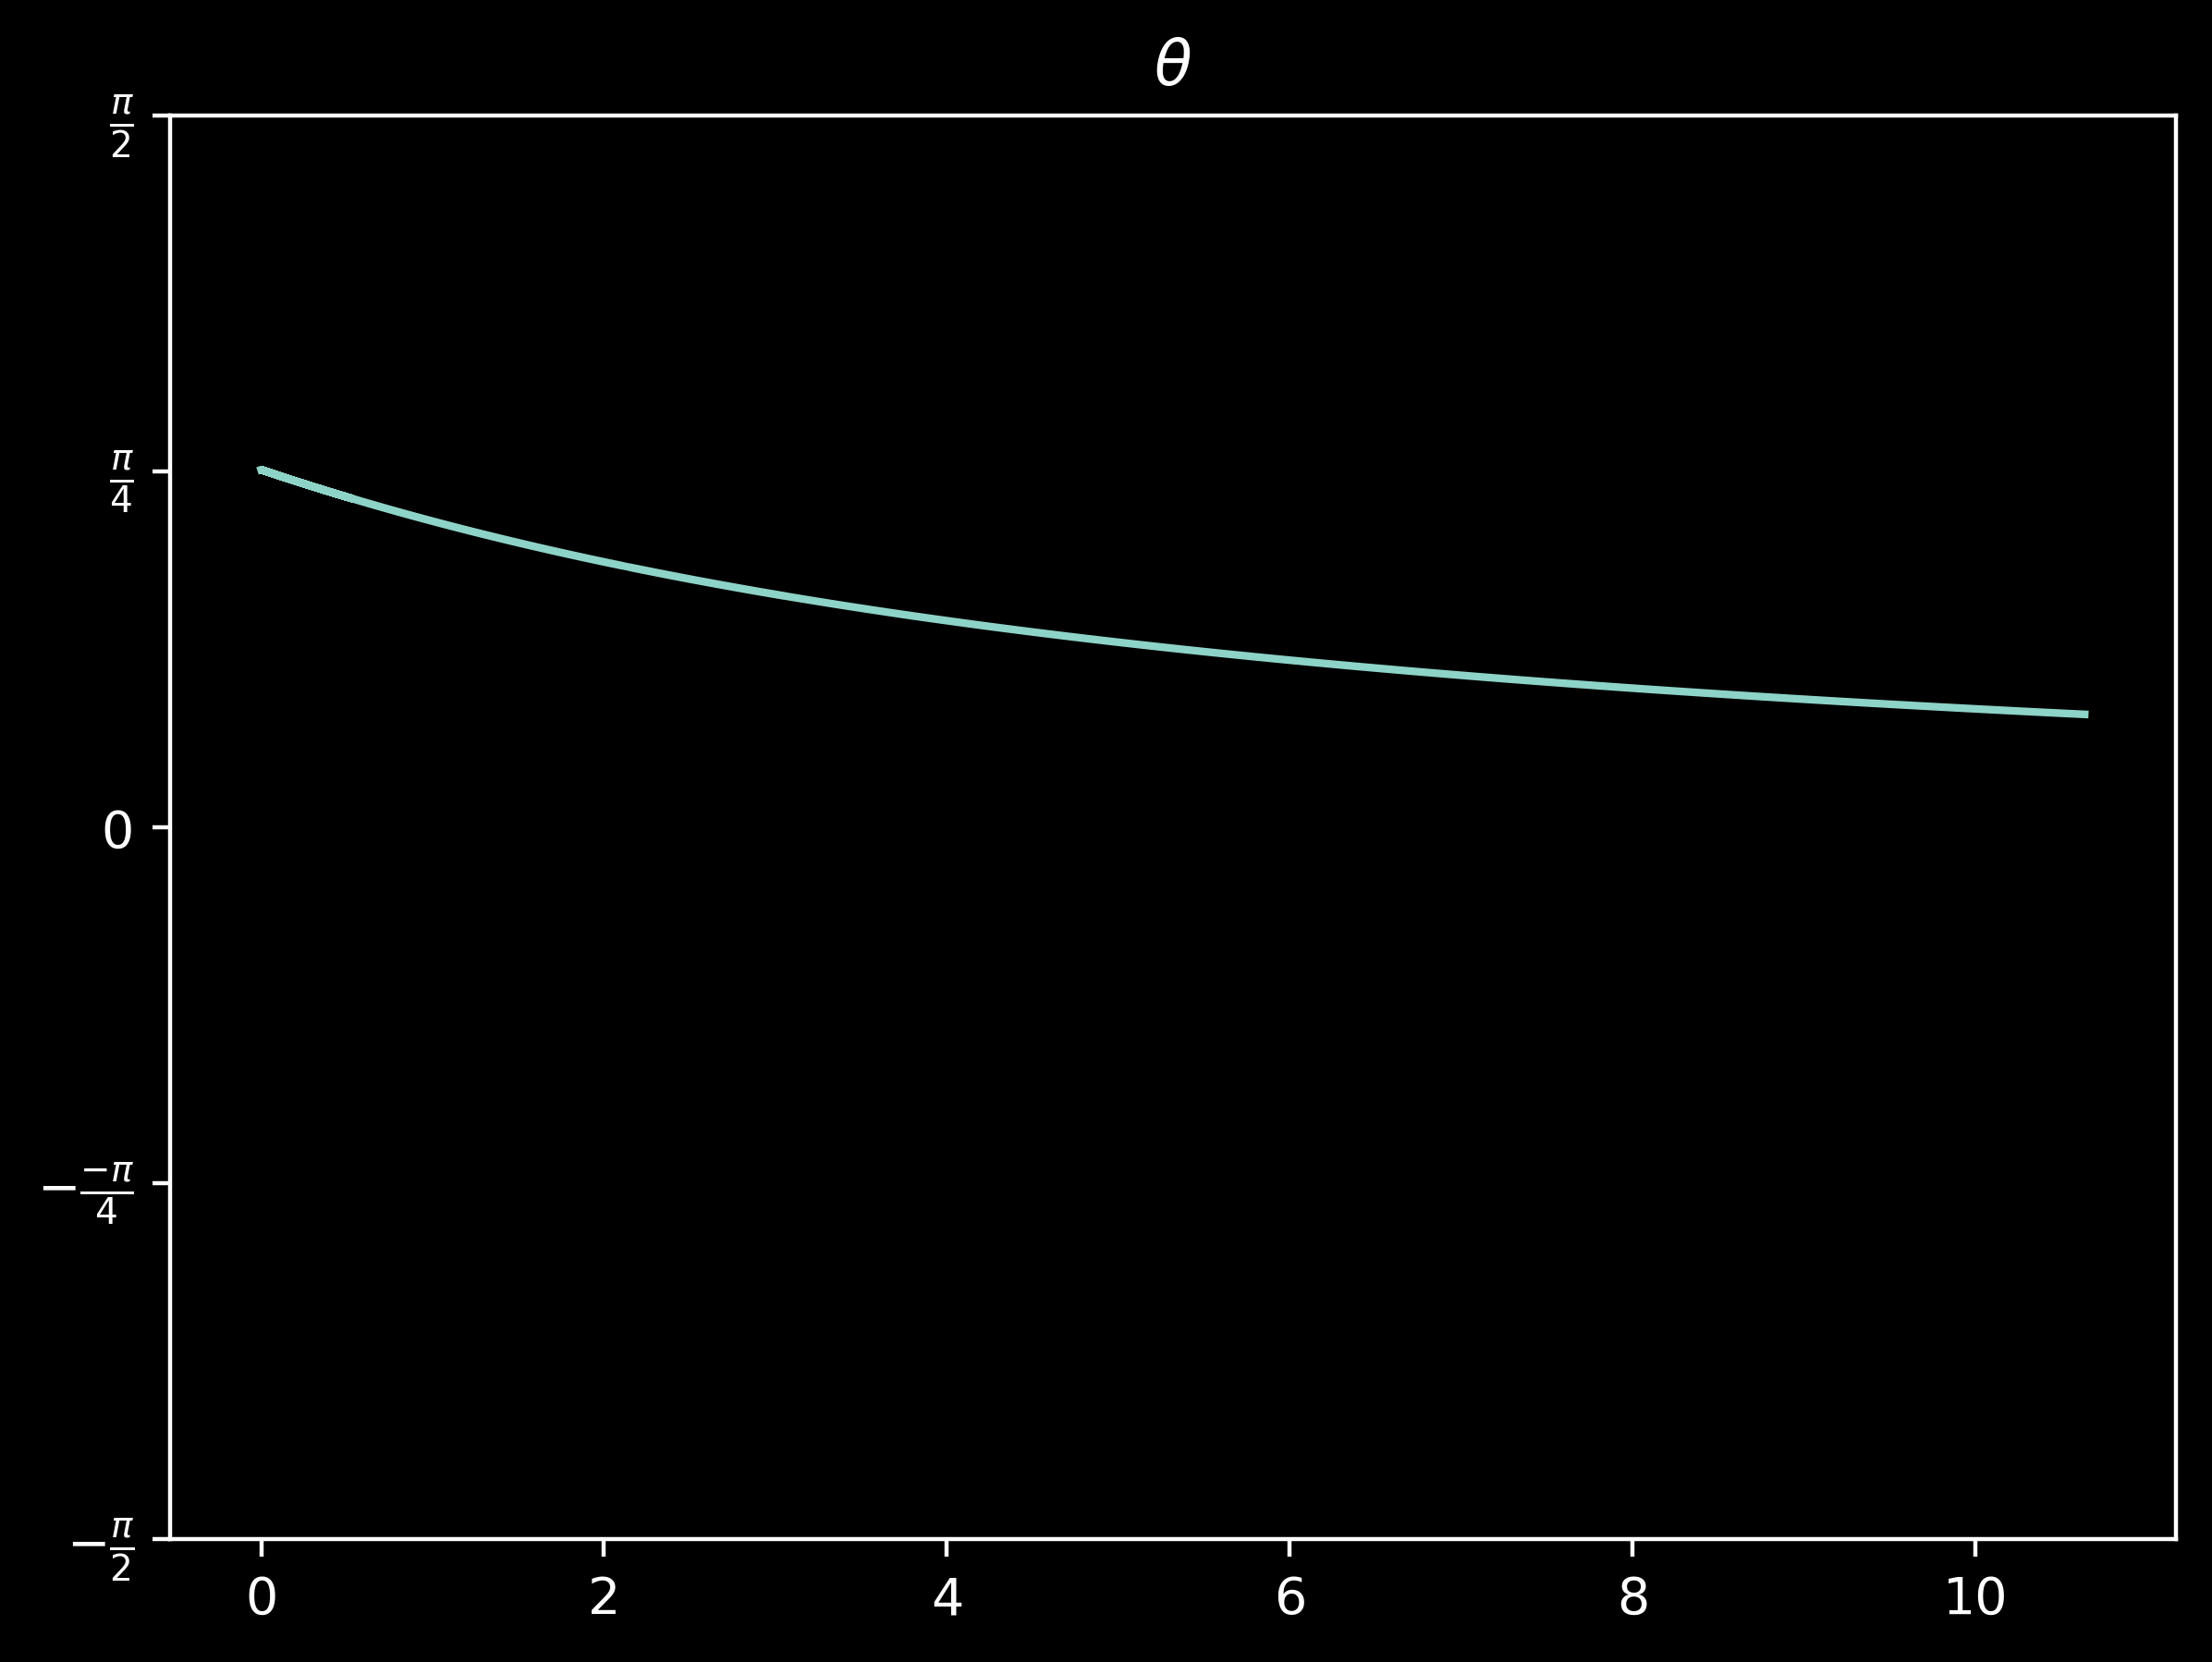

In [54]:
make_plots(TS, X, Y, XP, YP, UX, UY, TF)


### Timelapse Plot

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

def plot_timelapse(ts=TS, x=X, y=Y, xp=XP, yp=YP, ux=UX, uy=UY, tf=TF, N=7, width=0.3, alpha=None):
    def get_image():
        arr = plt.imread('./lander.png')
        return arr

    def imshow_affine(ax, z, *args, **kwargs):
        im = ax.imshow(z, *args, **kwargs)
        x1, x2, y1, y2 = im.get_extent()
        im._image_skew_coordinate = (x2, y1)
        return im

    # number of appearances
    # radians = np.arctan(uy/ux) + np.pi/2
    # radians = np.arctan(uy/ux)
    # radians = np.arctan(uy/ux) + np.pi/2
    radians = np.arctan2(-ux, uy)
    trajectory = np.array(list(zip(x, y, radians)))
    idx = np.round(np.linspace(0, len(trajectory) - 1, N, )).astype(int)
    
    trajectory = np.array(trajectory)[idx]

    # load the image
    lander = get_image()

    # set the width and height of the image
    image_ratio = lander.shape[0]/lander.shape[1]
    height = width*image_ratio # this scales the image so it doesn't get distorted



    # setup the plots
    fig, ax = plt.subplots()
    for i, t in enumerate(trajectory, start=1):

        #     # This allows for fading in time
        # if alpha is None:
        #     alpha=1
        # else:
        #     alpha = 0.8*i/len(trajectory)
            # alpha = .5

        xi, yi, deg = t
        im = imshow_affine(ax, lander, interpolation='none',
                        extent=[0, width, 0, height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, height//2
        im_trans = (mtransforms.Affine2D()
                    .rotate_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im.set_transform(im_trans)

    ax.set_xlim(np.min(trajectory[:, 0]) - 3*width, np.max(trajectory[:, 0]) + 3*width)
    ax.set_ylim(np.min(trajectory[:, 1]) - 3*height, np.max(trajectory[:, 1]) + 3*height)
    plt.show()

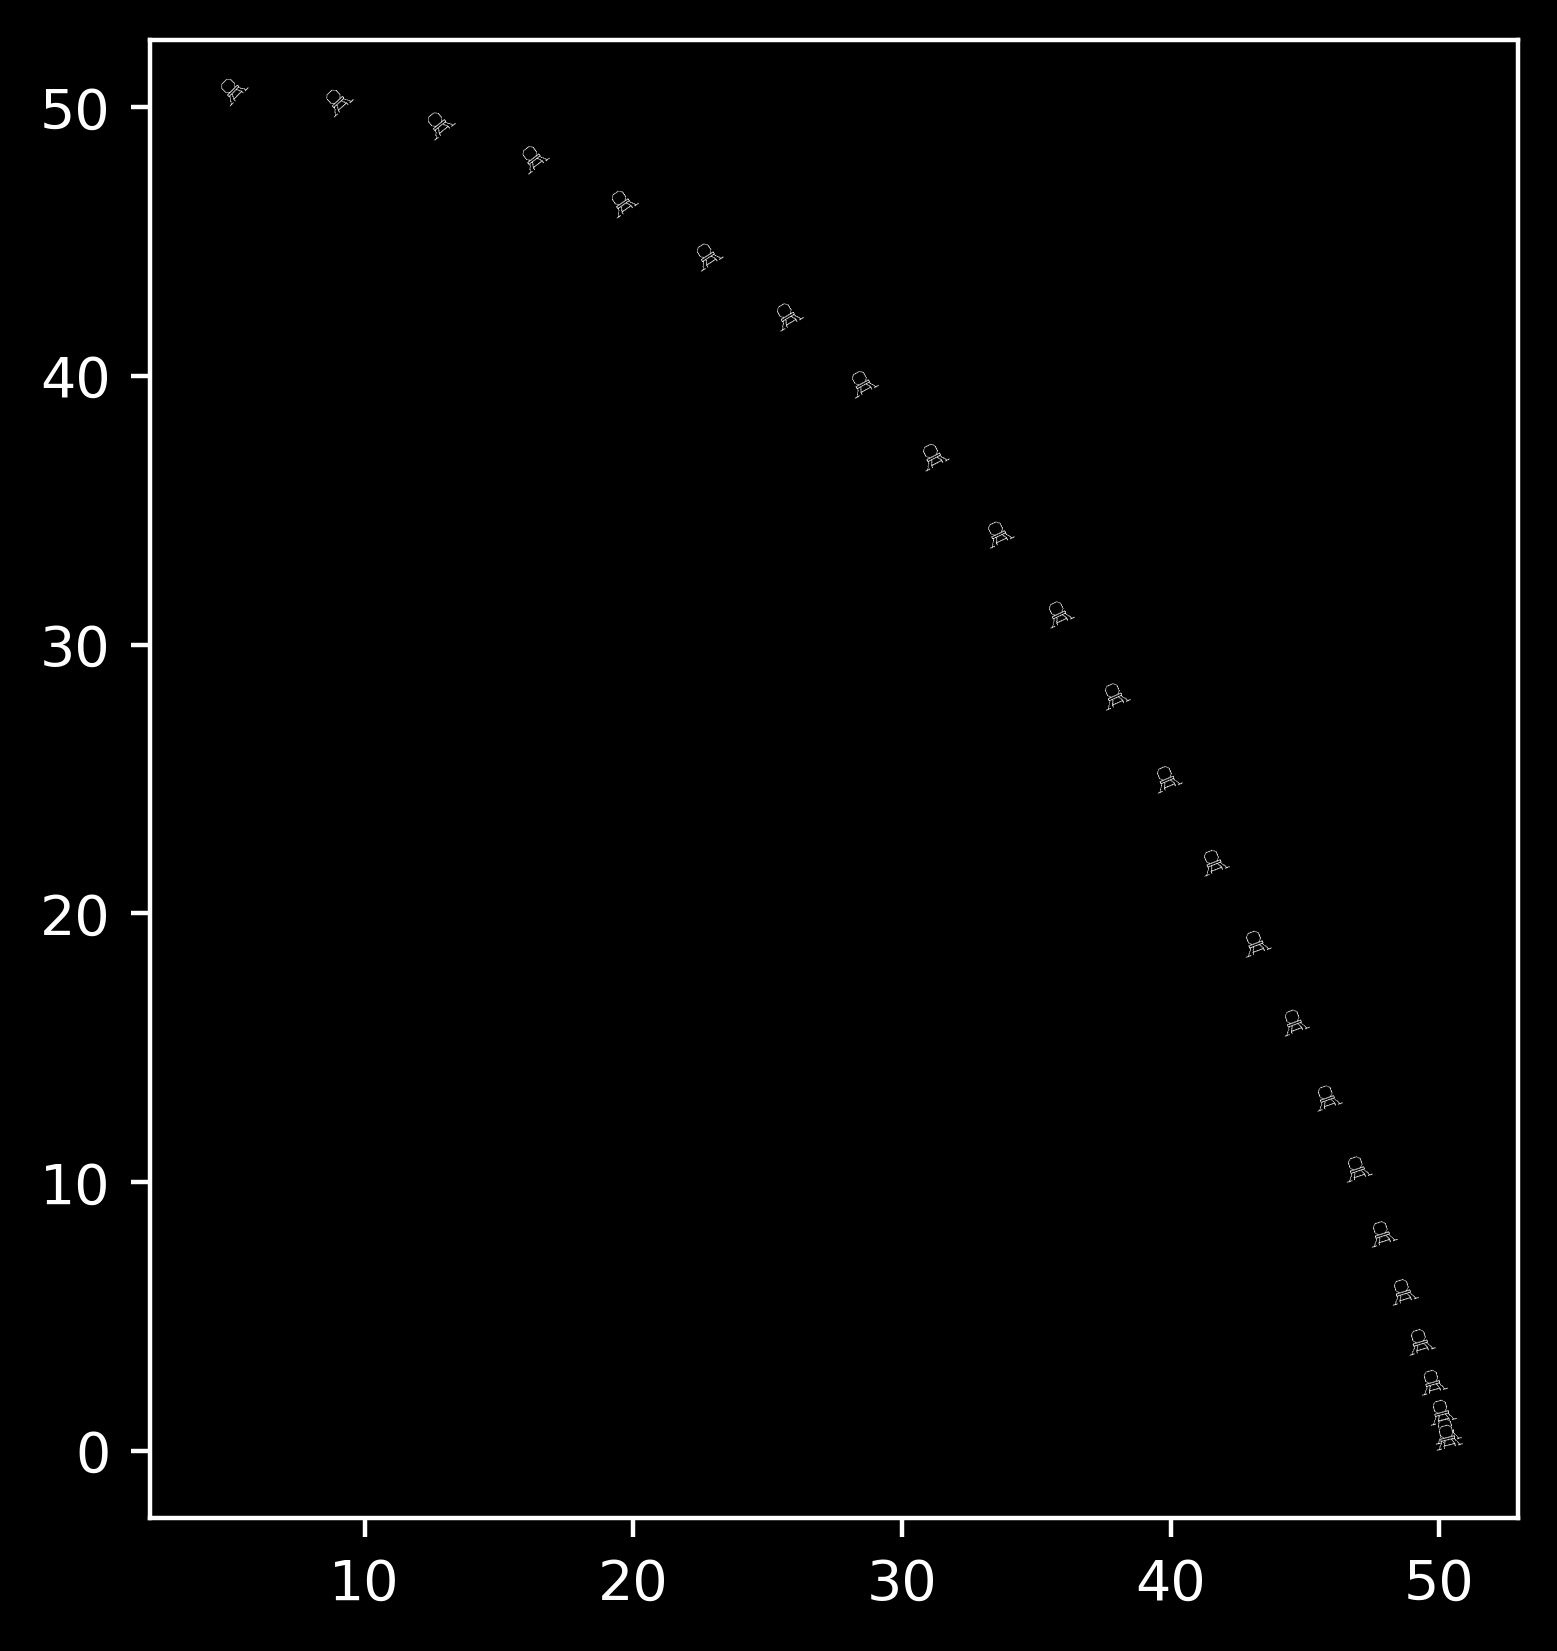

In [59]:
plot_timelapse(width=1, N=25)

In [18]:
def timelapse_test(ts=TS, x=X, y=Y, xp=XP, yp=YP, ux=UX, uy=UY, tf=TF, N=7, width=0.3, alpha=None):
    def get_image(filename='./lander.png'):
        arr = plt.imread(filename)
        return arr

    def imshow_affine(ax, z, *args, **kwargs):
        im = ax.imshow(z, *args, **kwargs)
        x1, x2, y1, y2 = im.get_extent()
        im._image_skew_coordinate = (x2, y1)
        return im

    trajectory = np.array([[0, 0, 0,],
                           [1, 0, 90,]])

    # load the image
    lander = get_image()
    thrust = get_image('full_lander_thrust.png')

    print(f'lander.shape, {lander.shape}')
    print(f'lander.shape, {lander.shape}')

    # set the width and height of the image
    lander_ratio = lander.shape[0]/lander.shape[1]
    lander_height = width*lander_ratio # this scales the image so it doesn't get distorted

    thrust_ratio = thrust.shape[0]/thrust.shape[1]
    thrust_height = width*thrust_ratio

    # This allows for fading in time
    if alpha is None:
        alpha=1
    else:
        alpha = 0.8*i/len(trajectory)

    # setup the plots
    fig, ax = plt.subplots()
    for i, t in enumerate(trajectory, start=1):
        xi, yi, deg = t
        im_lander = imshow_affine(ax, lander, interpolation='none',
                        extent=[0, width, 0, lander_height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, lander_height//2
        print("lander info")
        print(f'center_x:  {center_x}, center_y:  {center_y}, xi: {xi}, yi: {yi}')
        print(f'width: {width}, height: {lander_height}')

        im_lander_trans = (mtransforms.Affine2D()
                    .rotate_deg_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im_lander.set_transform(im_lander_trans)

        im_thrust = imshow_affine(ax, thrust, interpolation='none',
                        extent=[0, width, 0, thrust_height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, thrust_height//2
        print(center_x, center_y, xi, yi)
        im_thrust_trans = (mtransforms.Affine2D()
                    .rotate_deg_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im_thrust.set_transform(im_thrust_trans)
        print("thrust info")
        print(f'center_x:  {center_x}, center_y:  {center_y}, xi: {xi}, yi: {yi}')
        print(f'width: {width}, height: {lander_height}')

    ax.set_xlim(0, 2)
    ax.set_ylim(-.5, .5)
    plt.show()

lander.shape, (213, 255, 4)
lander.shape, (213, 255, 4)
lander info
center_x:  0.0, center_y:  0.0, xi: 0, yi: 0
width: 0.3, height: 0.25058823529411767
0.0 0.0 0 0
thrust info
center_x:  0.0, center_y:  0.0, xi: 0, yi: 0
width: 0.3, height: 0.25058823529411767
lander info
center_x:  0.0, center_y:  0.0, xi: 1, yi: 0
width: 0.3, height: 0.25058823529411767
0.0 0.0 1 0
thrust info
center_x:  0.0, center_y:  0.0, xi: 1, yi: 0
width: 0.3, height: 0.25058823529411767


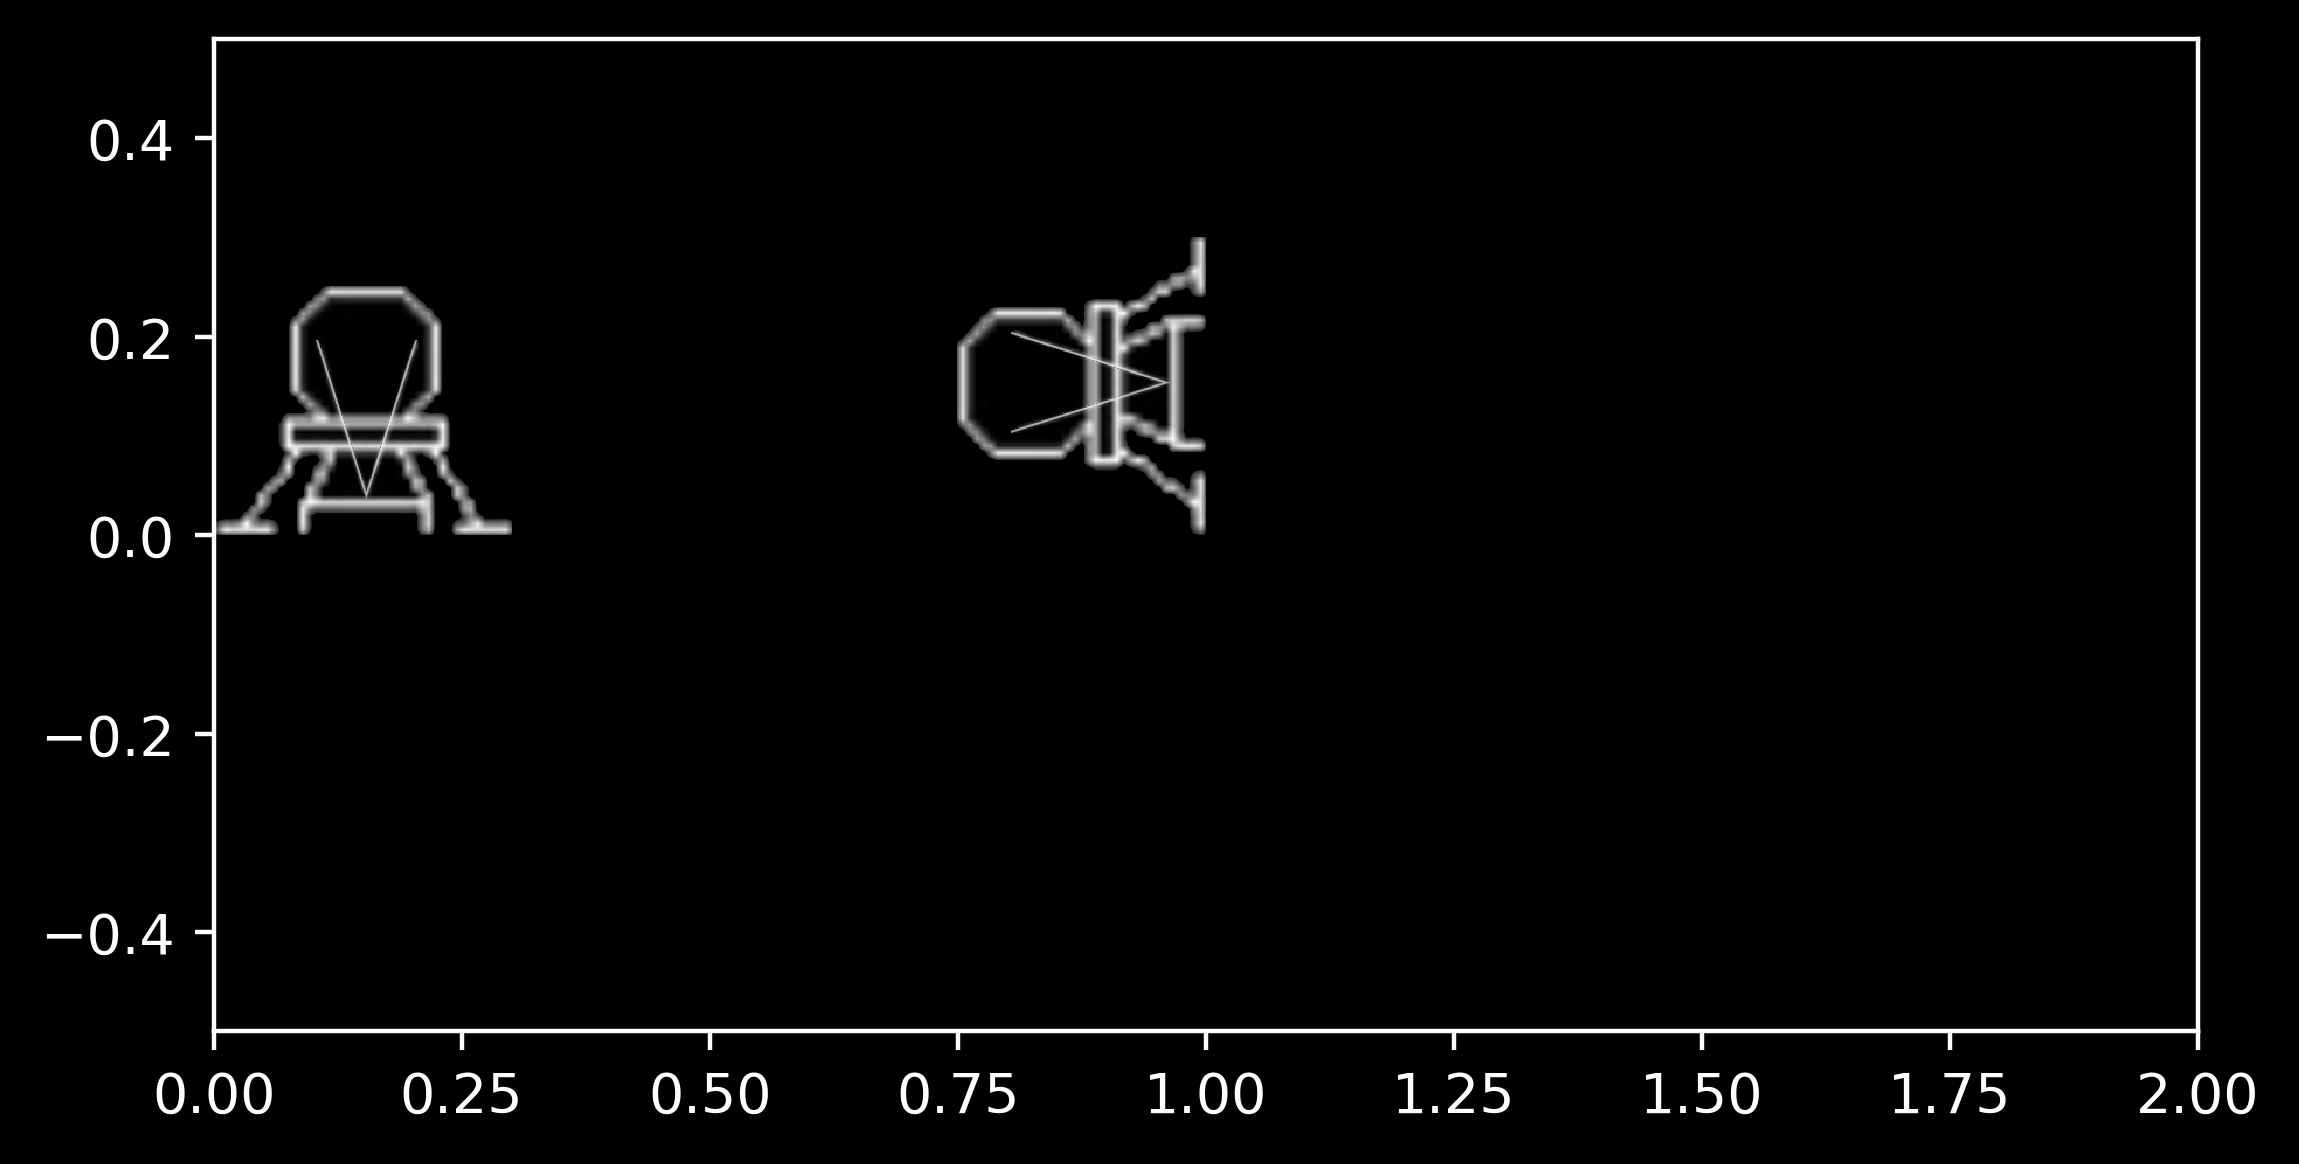

In [8]:
timelapse_test()